In [131]:
import os
import numpy as np
import pandas as pd

In [133]:
arquivos = [a for a in os.listdir() if a[:3] == 'bat']
dados = [[],[],[],[]]
for arq in arquivos:
    if arq[:4] == "bat1":
        dados[0].append(np.loadtxt(arq, delimiter='-'))
        
    if arq[:4] == "bat2":
        dados[1].append(np.loadtxt(arq, delimiter='-'))
        
    if arq[:4] == "bat3":
        dados[2].append(np.loadtxt(arq, delimiter='-'))
        
    if arq[:4] == "bat4":
        dados[3].append(np.loadtxt(arq, delimiter='-'))

dfs = []
dfs.append(pd.DataFrame(np.mean(dados[0], axis=0)).set_index([0,1,2,3]))
dfs.append(pd.DataFrame(np.mean(dados[1], axis=0)).set_index([0,1,2,3]))
dfs.append(pd.DataFrame(np.mean(dados[2], axis=0)).set_index([0,1,2,3]))
dfs.append(pd.DataFrame(np.mean(dados[3], axis=0)).set_index([0,1,2,3]))

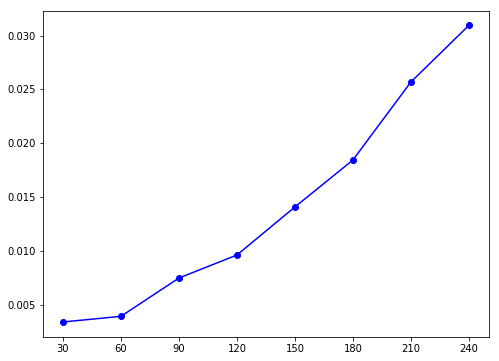

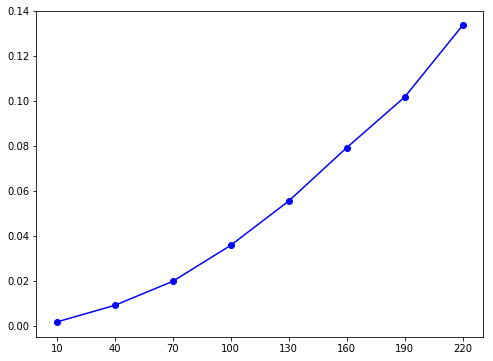

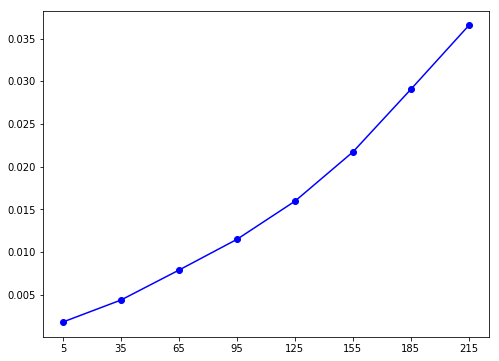

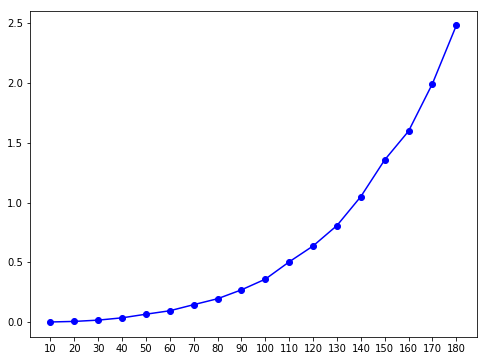

In [141]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.plot(dfs[0].index.levels[2], dfs[0].values, 'bo-')
plt.xticks(dfs[0].index.levels[2])
plt.show()

plt.figure(figsize=(8,6))
plt.plot(dfs[1].index.levels[1], dfs[1].values, 'bo-')
plt.xticks(dfs[1].index.levels[1])
plt.show()

plt.figure(figsize=(8,6))
plt.plot(dfs[2].index.levels[0], dfs[2].values, 'bo-')
plt.xticks(dfs[2].index.levels[0])
plt.show()

plt.figure(figsize=(8,6))
plt.plot(dfs[3].index.levels[1], dfs[3].values, 'bo-')
plt.xticks(dfs[3].index.levels[1])
plt.show()

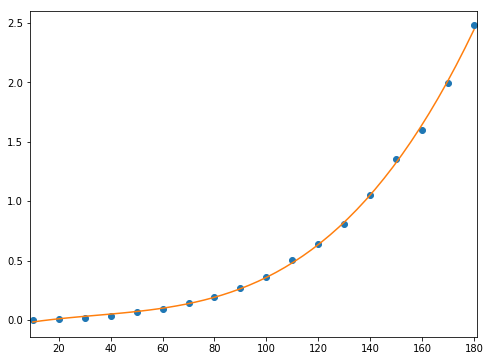

In [172]:
x = list(dfs[3].index.levels[1])
y = list(dfs[3].values)


z = np.polyfit(x, y, 3)
z = [i[0] for i in z]
f = np.poly1d(z)

x_new = np.linspace(x[0], x[-1], 50)
y_new = f(x_new)

plt.figure(figsize=(8,6))
plt.plot(x,y,'o', x_new, y_new)
plt.xlim([x[0]-1, x[-1] + 1 ])
plt.show()